In [1]:
from minisom import MiniSom

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
import time

In [4]:
Som_grid_Rows=60
som_grid_columns=40
iterations=500
sigma=10
learning_rate=0.5
load_breast_cancer

<function sklearn.datasets._base.load_breast_cancer(*, return_X_y=False, as_frame=False)>

In [5]:
#load data

In [6]:
data, target = load_breast_cancer(return_X_y=True)
data, target

(array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [7]:
data.shape

(569, 30)

In [8]:
data.shape[1]

30

In [9]:
#initialization
som=MiniSom(x=Som_grid_Rows,y=som_grid_columns,input_len=data.shape[1],sigma=sigma,learning_rate=learning_rate)
som.random_weights_init(data)


In [10]:
import time

# Step 1: Initialize start_time before the epoch
start_time = time.time()

# Step 2: Perform operations or training for one epoch
# Example: Training for one epoch
for batch in data:
    # Process batch
    print(batch,time.time()) # Placeholder for actual training operations

# Step 3: Calculate elapsed time after the epoch
elapsed_time = time.time() - start_time

# Step 4: Display or use the elapsed time
#print("Elapsed time for one epoch:", elapsed_time, "seconds")


[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01] 1706516136.9304712
[2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
 7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
 5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
 2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
 2.750e-01 8.902e-02] 1706516136.931471
[1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
 1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
 6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
 2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
 3.613e-01 8.758e-02] 1706516136.9324703
[1.142e+01 2.038e+01 7.758

In [11]:
#training
start_time=time.time()
som.train_random(data,iterations)
ellapsed_time=time.time()-start_time
print(ellapsed_time,"seconds")
print(start_time)

0.5361678600311279 seconds
1706516137.1733515


(0.0, 60.0, 0.0, 40.0)

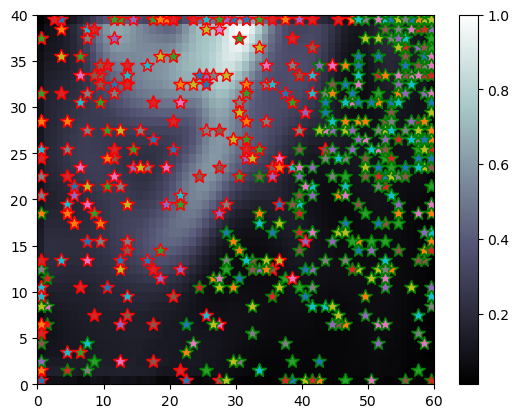

In [12]:
from pylab import plot,axis,show,pcolor,colorbar,bone
bone()
import matplotlib.pyplot as plt
pcolor(som.distance_map().T)
colorbar()
markers=["*","*","s"]
colors=["r","g","w"]
for i,j in enumerate(data):
    w=som.winner(j)
    plot(w[0]+.5,w[1]+.5,markers[target[i]],markeredgecolor=colors[target[i]],markersize=10,markeredgewidth=1)
#plt.plot(w[0] + 0.5, w[1] + 5, markers[target[i]],markerfacecolor="None",markeredgecolor=colors[target[i]], markersize=12,markeredgewidth=2)   
axis([0,som._weights.shape[0],0,som._weights.shape[1]])


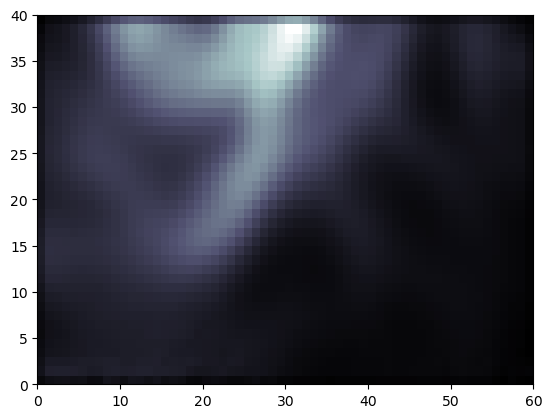

In [13]:
#print(colorbar())
print(pcolor(som.distance_map().T))

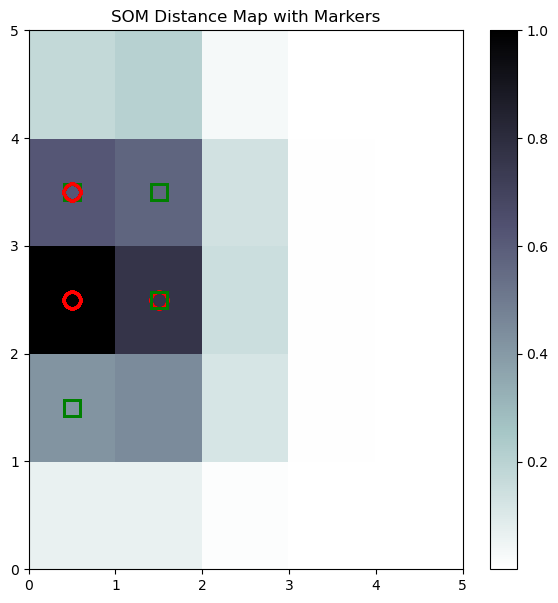

In [14]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt

# Instantiate and train the SOM (assuming data is already defined)
som = MiniSom(5, 5, data.shape[1], sigma=0.5, learning_rate=0.5)
som.train_random(data, 100)  # Adjust number of iterations as needed

# Visualize the SOM's distance map
plt.figure(figsize=(7, 7))
plt.pcolor(som.distance_map().T, cmap='bone_r')
plt.colorbar()

# Define markers and colors
markers = ["o", "s", "D"]
colors = ["r", "g", "b"]

# Overlay markers for each data point
for i, j in enumerate(data):
    w = som.winner(j)
    plt.plot(w[0] + 0.5, w[1] + 0.5, 
             markers[target[i]], 
             markerfacecolor="None",
             markeredgecolor=colors[target[i]],
             markersize=12,
             markeredgewidth=2)

# Set axis limits
plt.axis([0, som._weights.shape[0], 0, som._weights.shape[1]])

plt.title('SOM Distance Map with Markers')
plt.show()
